In [1]:
import csv, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('/Users/songkim/Google Drive/Primary/Projects/VerbVector/CREA_vrating_context_wb.csv', index_col=0)

In [3]:
raw.head()

,lemma,Database,AspClass,SynClass,No,Word,WC,ID,KRNS,N,...,Dom_PoS_SUBTLEX,All_PoS_SUBTLEX,Percentage_dom_PoS,Context 1,Context 2,Context 3,Context 4,Context 5,Context 6,Context 7
0,approach,CREA,activity,trans,181,approached,2,19,Y,27,...,Noun,Noun.Verb,0.63,The yellow dog approached the friendly teacher.,The priest approached the lonely family.,The mob approached the embassy.,The car approached the river.,NaN,NaN,NaN
1,arrest,CREA,achieve,trans,182,arrested,2,201,Y,30,...,Noun,Noun.Verb.Name,0.56,The soldier arrested the injured activist.,The policeman arrested the angry driver.,NaN,NaN,NaN,NaN,NaN
2,eat,CREA,activity,trans,183,ate,2,245,Y,29,...,Verb,Verb.Noun,1.00,The old farmer ate at the expensive hotel.,The dog ate the egg.,The commander ate chicken at dinner.,The tourist ate bread on vacation.,The reporter ate at the new restaurant.,NaN,NaN
3,block,CREA,both,trans,184,blocked,2,187,Y,27,...,Noun,Noun.Verb.Name,0.80,The bicycle blocked the green door.,The cloud blocked the sun.,NaN,NaN,NaN,NaN,NaN
4,buy,CREA,achieve,trans,185,bought,2,23,Y,29,...,Verb,Verb.Noun,0.99,The doctor bought the used boat.,The banker bought the expensive boat.,The diplomat bought the aggressive dog.,The parent bought the magazine.,The woman bought medicine at the store.,NaN,NaN


In [4]:
#raw_es = vector with only "Event/Social" features
raw_es = raw[['lemma', 'AspClass', 'SynClass', 'TimeCREA', 'DurationCREA', 'Long', 'Short', 'Caused', 'Consequential', 'Social', 'Human', 'Communication', 'Self', 'Cognition']]

In [5]:
raw_es.head()

,lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345
3,block,both,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552


In [6]:
#plt.scatter(rc_es["Consequential"], rc_es["SynClass"])
#plt.xlabel("ratings on 'Consequential'")
#plt.ylabel("SynClass")
#plt.show()

In [7]:
synclass = set(raw_es['SynClass'].to_list())
synclass

{'trans', 'unacc', 'unerg'}

In [8]:
#Let's test how event/social features cluster the datapoints into three clusters. 
K=3
Centroids = (raw_es.sample(n=K))

#for initial plotting
# plt.scatter(rc_es["Caused"], rc_es["SynClass"], c='black')
# plt.scatter(Centroids["Caused"], Centroids["SynClass"], c='red')
# plt.show()

In [9]:
features = raw_es.columns.to_list()[3:]
features

['TimeCREA',
 'DurationCREA',
 'Long',
 'Short',
 'Caused',
 'Consequential',
 'Social',
 'Human',
 'Communication',
 'Self',
 'Cognition']

In [10]:
#enumerate(features)

In [11]:
for i, j in enumerate(features):
    print (i,j)

0 TimeCREA
1 DurationCREA
2 Long
3 Short
4 Caused
5 Consequential
6 Social
7 Human
8 Communication
9 Self
10 Cognition


In [12]:
dic = {1:3, 2:4, 3:5}
len(dic.values())
#np.sqrt(sum(dic.values()))

3

In [13]:
diff = 1
j=0


while(diff!=0):
    XD=raw_es
    i=1
    for index_c,row_c in Centroids.iterrows():
        ED=[]
        for index_r,row_r in XD.iterrows():
            d_dict = {}
            for a, b in enumerate(features):
                d_dict[a+1] = (row_c[b]-row_r[b])**2
            d=np.sqrt(sum(d_dict.values()))
            ED.append(d)
        raw_es[i]=ED
        i=i+1
        
        
    C=[]
    for index,row in raw_es.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    raw_es["Cluster"]=C
    Centroids_new = raw_es.groupby(["Cluster"]).mean()[features]
    

    if j == 0:
        diff=1
        j=j+1
    else:
        diff = 0
        for c, d in enumerate(features):
            diff += (Centroids_new[d] - Centroids[d]).sum()
        print(diff)
    Centroids = raw_es.groupby(["Cluster"]).mean()[features]

1.4767481092436965
-0.05073495416348339


/Users/songkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/songkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0


In [14]:
raw_es.drop([1, 2, 3], axis=1)

,lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Cluster
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111,3
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667,3
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345,2
3,block,both,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963,2
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,want,state,trans,0.6154,0.8846,1.5769,1.8462,1.9231,3.6154,2.3846,4.7692,2.1923,3.4615,4.4615,1
58,watch,activity,trans,1.0690,1.5862,1.6207,2.0345,1.1724,1.9655,2.2069,2.7586,2.4483,3.5862,2.4483,1
59,go,achieve,unerg,1.0000,1.1290,1.2581,1.8387,1.5161,2.2903,1.7097,3.4194,0.7742,2.9677,0.8065,2
60,work,activity,unerg,4.5000,4.2857,2.6429,1.3571,2.8929,4.3214,4.9286,4.8929,3.4286,5.1071,4.0714,3


In [15]:
raw_es

,lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,1,2,3,Cluster
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111,3.801464,3.553398,2.828328,3
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667,6.224728,5.535054,4.415444,3
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345,4.675400,3.615410,5.898573,2
3,block,both,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963,4.933711,2.706459,6.026766,2
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552,3.353083,4.972894,1.867370,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,want,state,trans,0.6154,0.8846,1.5769,1.8462,1.9231,3.6154,2.3846,4.7692,2.1923,3.4615,4.4615,2.245324,4.659681,4.066242,1
58,watch,activity,trans,1.0690,1.5862,1.6207,2.0345,1.1724,1.9655,2.2069,2.7586,2.4483,3.5862,2.4483,1.871498,3.162048,4.159754,1
59,go,achieve,unerg,1.0000,1.1290,1.2581,1.8387,1.5161,2.2903,1.7097,3.4194,0.7742,2.9677,0.8065,3.697360,1.910898,5.445453,2
60,work,activity,unerg,4.5000,4.2857,2.6429,1.3571,2.8929,4.3214,4.9286,4.8929,3.4286,5.1071,4.0714,6.193325,7.752699,4.916784,3


In [16]:
# color=['blue','green','cyan']
# for k in range(K):
#     data=raw_es[raw_es["Cluster"]==k+1]
#     plt.scatter(data["AspClass"],data["SynClass"],c=color[k])
# #plt.scatter(Centroids["AspClass"],Centroids["SynClass"],c='red')
# plt.xlabel('AspClass')
# plt.ylabel('SynClass')
# plt.show()

In [17]:
raw_es.drop([1,2,3], axis=1)

,lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Cluster
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111,3
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667,3
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345,2
3,block,both,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963,2
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,want,state,trans,0.6154,0.8846,1.5769,1.8462,1.9231,3.6154,2.3846,4.7692,2.1923,3.4615,4.4615,1
58,watch,activity,trans,1.0690,1.5862,1.6207,2.0345,1.1724,1.9655,2.2069,2.7586,2.4483,3.5862,2.4483,1
59,go,achieve,unerg,1.0000,1.1290,1.2581,1.8387,1.5161,2.2903,1.7097,3.4194,0.7742,2.9677,0.8065,2
60,work,activity,unerg,4.5000,4.2857,2.6429,1.3571,2.8929,4.3214,4.9286,4.8929,3.4286,5.1071,4.0714,3


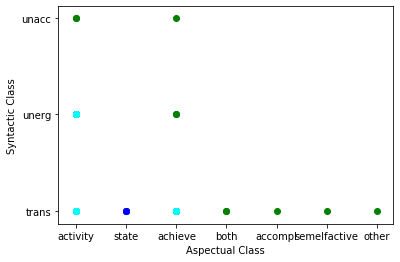

In [33]:
color=['blue','green','cyan']
for k in range(K):
    data=raw_es[raw_es["Cluster"]==k+1]
    plt.scatter(data["AspClass"],data["SynClass"],c=color[k])
#plt.scatter(Centroids["AspClass"],Centroids["SynClass"],c='red')
plt.xlabel('Aspectual Class')
plt.ylabel('Syntactic Class')
plt.show()

In [25]:
groups = raw_es.groupby('Cluster')

In [39]:
raw_es['AspClass']

0     activity
1      achieve
2     activity
3         both
4      achieve
        ...   
57       state
58    activity
59     achieve
60    activity
61    activity
Name: AspClass, Length: 62, dtype: object

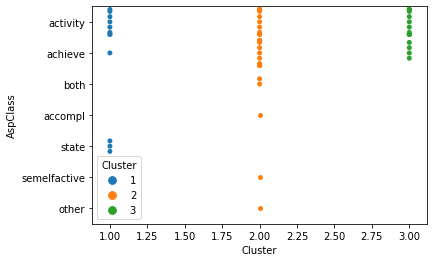

In [54]:
import seaborn as sns
sns.swarmplot("Cluster", 'AspClass', hue='Cluster', data=raw_es)


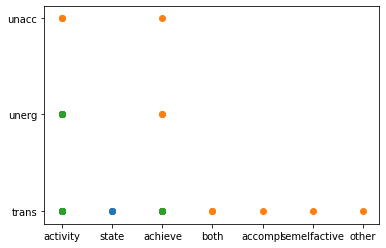

In [30]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group['AspClass'], group['SynClass'], marker='o', label=name)
    

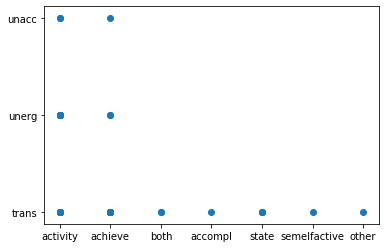

In [31]:
plt.scatter(raw_es['AspClass'], raw_es["SynClass"])

In [19]:
raw_neat = raw_es.sort_values(by=['Cluster']).drop([1,2,3], axis=1)

In [20]:
raw_neat.to_csv('/Users/songkim/Google Drive/Primary/Projects/VerbVector/kmeans_result.csv')